## Enron Scandal - Email Analysis  
Aditya Poduval, Adityadev Singh, Soumya Bandyopadhyay  
Data Bootcamp - Spring 2017


### Project Overview
-----------------------  
The Enron scandal, publicized in October 2001, eventually led to the bankruptcy of the Enron Corporation, an American energy company, and the de facto dissolution of Arthur Andersen, which was one of the five largest audit and accountancy partnerships in the world. In addition to being the largest bankruptcy reorganization in American history at that time, Enron was cited as the biggest audit failure. The leadership at Enron used accounting loopholes, special purpose entities, and poor financial reporting to hide billions of dollars in debt from failed deals and projects. Exposure of this scandal to the public led to the demise of the firm.

In this project, our goal will be to analyze the emails exchanged amongst employees within the company in the surrounding timeframe of the scandals publicization. We will attempt to perform numerous time series analysis to identify whether there are any indicators for the scandal prior to its publicization. An attempt will also be made at leveraging Python’s NLTK library to run text analytic techniques such as sentiment analysis to analyze the emails for sentiment trends.


### Data
------------------------------  
##### Data Source:
We obtained our data through Kaggle: https://www.kaggle.com/wcukierski/enron-email-dataset. It was originally compiled by the Computer Science department at Carnegie Mellon University. 
This is the May 7, 2015 Version of dataset, as published at https://www.cs.cmu.edu/~./enron/

##### Data Description:
 The Enron email dataset contains approximately **500,000 emails** generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

##### Data Structure:
The data comes in a clean csv format, with two columns:   
**File** - shows the root sender of the email  
**Message** - It has the actual email content

Our first challenge was data cleansing and preparation so that we could narrow down the variables that we needed to work with. From the “message” column, we retrieved the following information fields: Date, From, To, Subject, Cc, Content. 
In addition, we segregated the data by the date sent so that we could observe time trends.

##### Note:  
1. Since the data size is extremely large, on rare occasions Jupyter Ipynb notebook throws an error at random points of code execution. In this case, one has to re-run the code from the beginning (this occurs very rarely).
2. For sentiment analysis, we have taken a sample of the dataset (1/100th of total). Execution time was over 2 hours even for this sample so for faster execution you may want to consider taking an even smaller sample size (e.g. 1/500th of total records).


### Appendix  
---------------  
#### Appendix A  
  
Retrieve and read in data. We have a dropbox link to the csv file.

In [1]:
!curl -L 'https://www.dropbox.com/s/lsae1pwwb8zgobq/emails.csv?dl=0' -o /Users/soumya/Data_Bootcamp_Project/emails.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1360M  100 1360M    0     0  12.4M      0  0:01:49  0:01:49 --:--:-- 13.1M5:32  0:00:04  0:05:28 6092k04:07 7426k03:15  0:00:07  0:03:08 10.4M8 12.1M02:01  0:00:22  0:01:39 14.4M   0  0:01:48  0:00:56  0:00:52 12.4M  12.5M      0  0:01:48  0:01:05  0:00:43 11.3M49  0:01:36  0:00:13 11.6M00:03 12.5M


In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize.regexp import RegexpTokenizer
import seaborn as sns; sns.set_style('whitegrid')

f = "/Users/soumya/Data_Bootcamp_Project/emails.csv"

Fetch the entire data to perform time series analysis.

In [22]:
emails = pd.read_csv(f)

### Note: Please run the below cell when performing sentiment analysis (Appendix E  - Text Analysis) only. Please skip when doing other analysis.
We get a random sample set to perform analysis on. The jupyter notebook fails to perform analysis on the entire dataset of size 1.43GB.

In [3]:
num_lines = sum(1 for l in open(f))
size = int(num_lines/100)
skip_idx = random.sample(range(1, num_lines), num_lines - size)

emails = pd.read_csv(f, skiprows=skip_idx)

Below is the entire code for cleaning the emails and returning an output data frame that has columns responding to the variables we want to analyze.

In [23]:
date = []
from1 = []
to1 = []
subject = []
cc = []
content = []
datestart = "\nDate: "
dateend = "\nFrom: "
fromstart = "\nFrom: "
fromend = "\nTo: "
fromend1 = "\nSubject:"
tostart = "\nTo: "
toend = "\nSubject: "
subjectstart = "\nSubject: "
subjectend = "\nCc: "
subjectend1 = "\n"
ccstart = "\nCc: "
ccend = "\n"


for i in emails['message']:
    s = i
    date.append(s.split(datestart)[1].split(dateend)[0])
    if tostart in s:
        from1.append(s.split(fromstart)[1].split(fromend)[0])
        to1.append(s.split(tostart)[1].split(toend)[0])
    else:
        from1.append(s.split(fromstart)[1].split(fromend1)[0])
        to1.append('NA')
    
    if subjectend in s:
        cc.append(s.split(subjectend)[1].split(ccend)[0])
        subject.append(s.split(subjectstart)[1].split(subjectend)[0])
    else:
        subject.append(s.split(subjectstart)[1].split(subjectend1)[0])
        cc.append('NA')

contentstart = "\n\n"
contentend = "-----Original Message-----"
y = []
for i in emails['message']:
    if contentend in i:
        y.append(i.split(contentstart, 1)[1].split(contentend)[0])
    else:
        y.append(i.split(contentstart, 1)[1])

contentstart1 = "\nSubject:"
contentend1 = "---------------------- Forwarded by"
z = []
for i in y:
    if contentstart1 in i:
        if contentend1 in i:
            z.append(i.split(contentstart1)[1].split(contentend1)[0])
        else:
            z.append(i)
    else:
        z.append(i)
        
emails['date'] = date
datefinal = []
for i in emails['date']:
    datefinal.append(i.rsplit(None,3)[0].rsplit(',')[1])

emails['date'] = datefinal
datetimefinal = pd.to_datetime(emails['date'], format = "%d/%m/%Y", infer_datetime_format = True)
emails['date'] = datetimefinal

emails['from'] = from1
emails['to'] = to1
emails['subject'] = subject
emails['content'] = z
emails['cc'] = cc
emails['user'] = emails['file'].map(lambda x:x.split('/')[0])

emails = emails.drop(['message'], axis=1)
emails = emails.drop(['file'],axis=1)

#### Appendix B - Emails Per Year  
  
First, we split the data frame to multiple data frames in terms of year.

In [24]:
emails1999 = emails[emails['date'] >= pd.datetime(1999,1,1)]
emails1999 = emails1999[emails1999['date'] < pd.datetime(2000,1,1)]

emails2000 = emails[emails['date'] >= pd.datetime(2000,1,1)]
emails2000 = emails2000[emails2000['date'] < pd.datetime(2001,1,1)]

emails2001 = emails[emails['date'] >= pd.datetime(2001,1,1)]
emails2001 = emails2001[emails2001['date'] < pd.datetime(2002,1,1)]

emails2002 = emails[emails['date'] >= pd.datetime(2002,1,1)]
emails2002 = emails2002[emails2002['date'] < pd.datetime(2003,1,1)]

emails2003 = emails[emails['date'] >= pd.datetime(2003,1,1)]
emails2003 = emails2003[emails2003['date'] < pd.datetime(2004,1,1)]

emails2004 = emails[emails['date'] >= pd.datetime(2004,1,1)]
emails2004 = emails2004[emails2004['date'] < pd.datetime(2005,1,1)]

numberofemailsperyear = pd.DataFrame()
numberofemailsperyear['Year'] = ["1999","2000","2001","2002","2003","2004"]
numberofemailsperyear['Number of Emails'] = [len(emails1999),len(emails2000),len(emails2001),len(emails2002),len(emails2003),len(emails2004)]
numberofemailsperyear = numberofemailsperyear.set_index('Year')

We can now plot the data frame to see the number of emails sent per year.

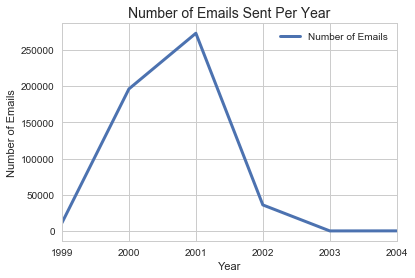

In [25]:
fig, ax = plt.subplots()
numberofemailsperyear.plot(ax=ax, kind='line', linewidth = 3, grid = True)
ax.set_title("Number of Emails Sent Per Year", size =14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Emails')

Conclusion: Emails reach their peak in the year - 2001 for the dataset provided.  
Since data is available only till 2002, no email records are plotted for years - 2003 and 2004

** Plot to see which days of the week see the most e-mail activity: **

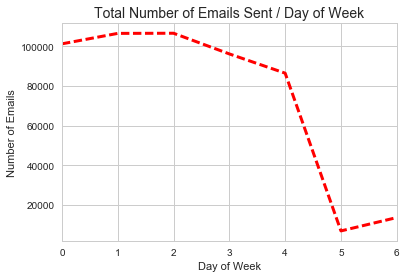

In [26]:
fig, ax = plt.subplots()
emails.groupby(emails['date'].dt.dayofweek)['content'].count().plot(ax=ax, kind='line', grid = True, linewidth = 3 , 
                                                                    color = 'red', linestyle ='dashed')
ax.set_title("Total Number of Emails Sent / Day of Week", size =14)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Emails')
# For Day of week : 0 - correpsonds to Monday, 1- Tuesday, ..... 6 - Sunday

Conclusion: Days 1 and 2 i.e. Tuesday and Wednesday saw the most e-mail activity with a sharp fall off over the weekend.

#### Appendix C  - Close-Up of 2001
  
Now, we want to look more specifically at 2001. We seperate the 2001 data frame even further, this time in terms of month. 

In [27]:
emails2001jan = emails[emails['date'] >= pd.datetime(2001,1,1)]
emails2001jan = emails2001jan[emails2001jan['date'] < pd.datetime(2001,2,1)]

emails2001feb = emails[emails['date'] >= pd.datetime(2001,2,1)]
emails2001feb = emails2001feb[emails2001feb['date'] < pd.datetime(2001,3,1)]

emails2001mar = emails[emails['date'] >= pd.datetime(2001,3,1)]
emails2001mar = emails2001mar[emails2001mar['date'] < pd.datetime(2001,4,1)]

emails2001apr = emails[emails['date'] >= pd.datetime(2001,4,1)]
emails2001apr = emails2001apr[emails2001apr['date'] < pd.datetime(2001,5,1)]

emails2001may = emails[emails['date'] >= pd.datetime(2001,5,1)]
emails2001may = emails2001may[emails2001may['date'] < pd.datetime(2001,6,1)]

emails2001jun = emails[emails['date'] >= pd.datetime(2001,6,1)]
emails2001jun = emails2001jun[emails2001jun['date'] < pd.datetime(2001,7,1)]

emails2001jul = emails[emails['date'] >= pd.datetime(2001,7,1)]
emails2001jul = emails2001jul[emails2001jul['date'] < pd.datetime(2001,8,1)]

emails2001aug = emails[emails['date'] >= pd.datetime(2001,8,1)]
emails2001aug = emails2001aug[emails2001aug['date'] < pd.datetime(2001,9,1)]

emails2001sep = emails[emails['date'] >= pd.datetime(2001,9,1)]
emails2001sep = emails2001sep[emails2001sep['date'] < pd.datetime(2001,10,1)]

emails2001oct = emails[emails['date'] >= pd.datetime(2001,10,1)]
emails2001oct = emails2001oct[emails2001oct['date'] < pd.datetime(2001,11,1)]

emails2001nov = emails[emails['date'] >= pd.datetime(2001,11,1)]
emails2001nov = emails2001nov[emails2001nov['date'] < pd.datetime(2001,12,1)]

emails2001dec = emails[emails['date'] >= pd.datetime(2001,12,1)]
emails2001dec = emails2001dec[emails2001dec['date'] < pd.datetime(2002,1,1)]

numberofemails2001 = pd.DataFrame()
numberofemails2001['Month'] = ["Jan","Feb","Mar","Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
numberofemails2001['Number of Emails'] = [len(emails2001jan),len(emails2001feb), len(emails2001mar), len(emails2001apr),
                                          len(emails2001may), len(emails2001jun), len(emails2001jul), len(emails2001aug),
                                          len(emails2001sep), len(emails2001oct), len(emails2001nov), len(emails2001dec)]
numberofemails2001 = numberofemails2001.set_index('Month')

** Plot to see the number of emails sent per month: **

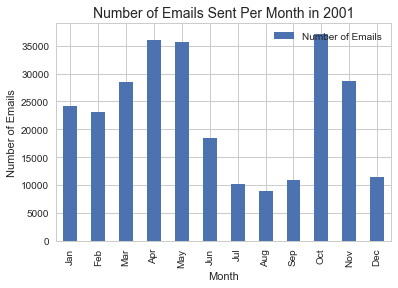

In [28]:
fig, ax = plt.subplots()
numberofemails2001.plot(ax=ax, kind='bar', grid = True)
ax.set_title("Number of Emails Sent Per Month in 2001", size =14)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Emails')

Conclusion: Email traffic saw a sharp decline prior to October. When the scandal went public in October, email traffic hit its peak.

** Word Count Analysis segregated by User: **

In [29]:
tokenizer = RegexpTokenizer(r'(?u)\b\w\w+\b')

emails['subject_wc'] = emails['subject'].map(lambda x: len(tokenizer.tokenize(x)))
emails['content_wc'] = emails['content'].map(lambda x: len(tokenizer.tokenize(x)))

In [30]:
grouped_by_people = emails.groupby('user').agg({
        'content': 'count', 
        'subject_wc': 'mean',
        'content_wc': 'mean',
    })
grouped_by_people.rename(columns={'content': 'Number of emails', 
                                  'subject_wc': 'Subject word count', 
                                  'content_wc': 'Content word count'}, inplace=True)
grouped_by_people.sort('Number of emails', ascending = False).head()

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Number of emails,Subject word count,Content word count
user,,,
kaminski-v,28465,6.263341,176.123942
dasovich-j,28234,11.370546,528.601084
kean-s,25351,9.258530,421.709834
mann-k,23381,8.273213,120.553612
jones-t,19950,7.097895,139.815489


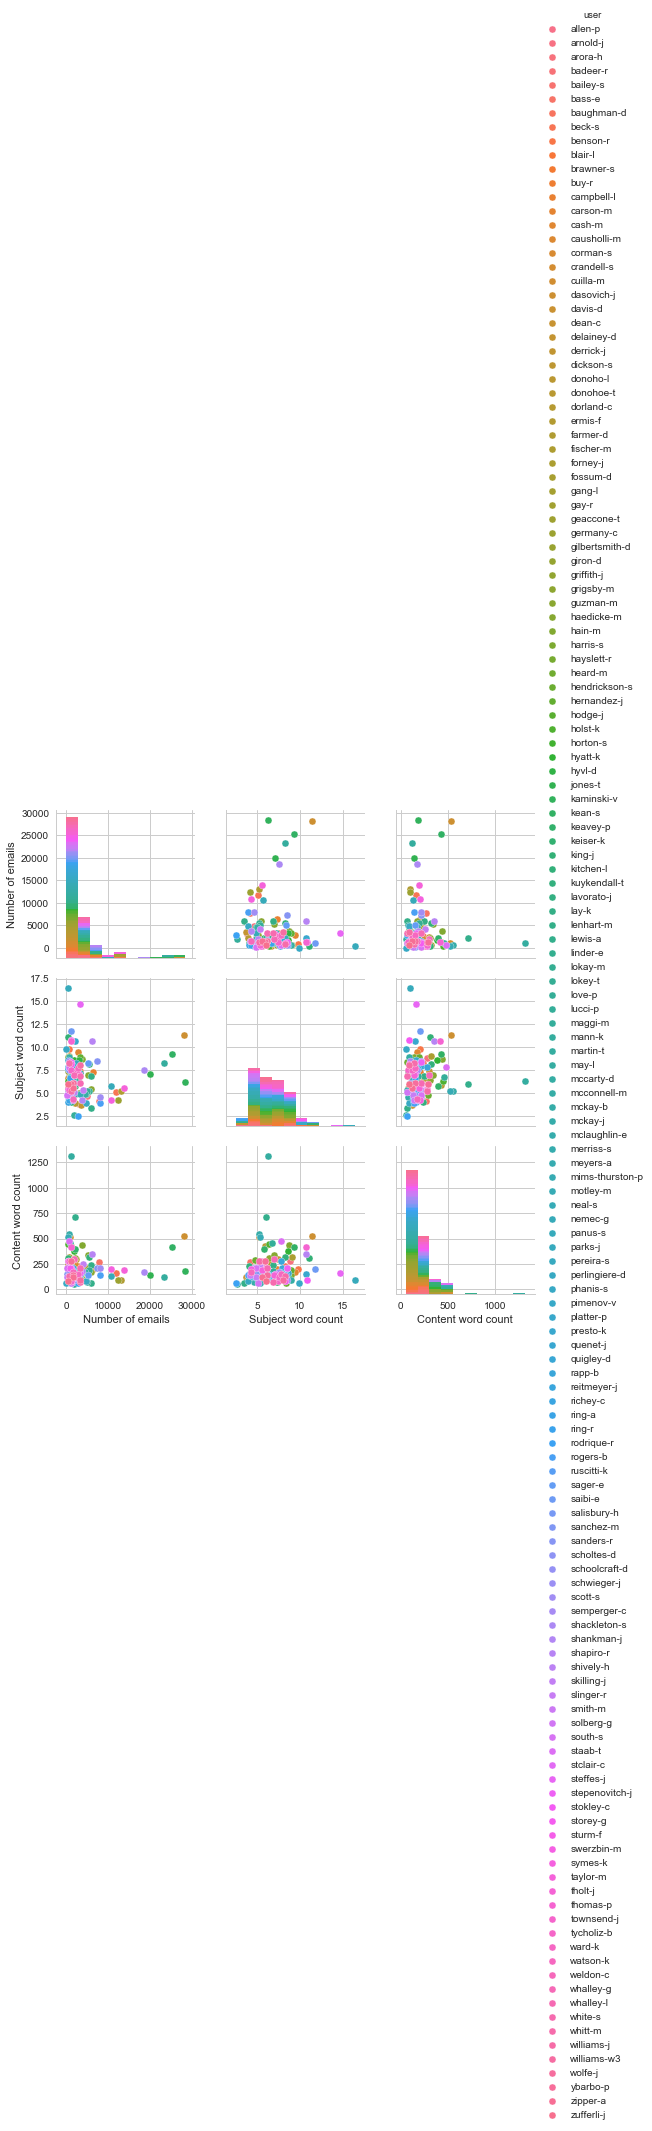

In [31]:
sns.pairplot(grouped_by_people.reset_index(), hue='user')

#### Appendix D  - Network Effects
  
Perform value counts to see which email sent the most mails.

In [32]:
from_list = emails2001['from'].value_counts(ascending=False).head(5)
from_list = from_list.to_frame()
from_list = from_list.reset_index()
from_list = from_list.rename(index=str, columns={"index":"email", "from": "from_count"})
from_list

,email,from_count
0,kay.mann@enron.com,8910
1,jeff.dasovich@enron.com,8101
2,pete.davis@enron.com,6470
3,vince.kaminski@enron.com,4748
4,no.address@enron.com,4572


In [33]:
to_list_1 = emails2001[~emails2001['to'].isin(['NA'])]
to_list = to_list_1['to'].value_counts(ascending=False).head(5)
to_list = to_list.to_frame()
to_list = to_list.reset_index()
to_list = to_list.rename(index=str, columns={"index":"email", "to": "to_count"})
to_list

,email,to_count
0,pete.davis@enron.com,6477
1,jeff.dasovich@enron.com,2904
2,kate.symes@enron.com,2845
3,tana.jones@enron.com,2355
4,kay.mann@enron.com,2217


#### Appendix E  - Text Analysis


In [11]:
contents1 = ""
for i in range(len(emails['from'])):
    if emails['from'][i] == from_list['email'][0]:
        contents1 = contents1 + " " + emails['to'][i] + " " + emails['cc'][i]

tok1 = contents1.split()

contents2 = ""
for i in range(len(emails['from'])):
    if emails['from'][i] == from_list['email'][1]:
        contents2 = contents2 + " " + emails['to'][i] + " " + emails['cc'][i]

tok2 = contents2.split()

contents3 = ""
for i in range(len(emails['from'])):
    if emails['from'][i] == from_list['email'][2]:
        contents3 = contents3 + " " + emails['to'][i] + " " + emails['cc'][i]

tok3 = contents3.split()

contents4 = ""
for i in range(len(emails['from'])):
    if emails['from'][i] == from_list['email'][3]:
        contents4 = contents4 + " " + emails['to'][i] + " " + emails['cc'][i]

tok4 = contents4.split()

contents5 = ""
for i in range(len(emails['from'])):
    if emails['from'][i] == from_list['email'][4]:
        contents5 = contents5 + " " + emails['to'][i] + " " + emails['cc'][i]

tok5 = contents5.split()

In [ ]:
# Skip this step if nltk has already been downloaded
nltk.download()

In [12]:
import nltk
texttest1 = nltk.Text(tok1)
texttest2 = nltk.Text(tok2)
texttest3 = nltk.Text(tok3)
texttest4 = nltk.Text(tok4)
texttest5 = nltk.Text(tok5)
freqdistemail1 = texttest1.vocab()
freqdistemail2 = texttest2.vocab()
freqdistemail3 = texttest3.vocab()
freqdistemail4 = texttest4.vocab()
freqdistemail5 = texttest5.vocab()

fromtodf = pd.DataFrame()
fromtodf_from = []
fromtodf_to = []
email_count = []

for i in range(len(from_list['email'])):
    fromtodf_from.append(from_list['email'][i])
   
fromtodf_to = [freqdistemail1.most_common()[1][0],freqdistemail2.most_common()[1][0],freqdistemail3.most_common()[1][0],freqdistemail4.most_common()[1][0],
               freqdistemail5.most_common()[1][0]]
email_count = [freqdistemail1.most_common()[1][1],freqdistemail2.most_common()[1][1],freqdistemail3.most_common()[1][1],freqdistemail4.most_common()[1][1],
               freqdistemail5.most_common()[1][1]]   
fromtodf['From'] = fromtodf_from
fromtodf['To'] = fromtodf_to
fromtodf['Email Count'] = email_count

fromtodf

,From,To,Email Count
0,kay.mann@enron.com,suzanne.adams@enron.com,19
1,jeff.dasovich@enron.com,"richard.shapiro@enron.com,",27
2,pete.davis@enron.com,"craig.dean@enron.com,",92
3,kate.symes@enron.com,kerri.thompson@enron.com,12
4,enron.announcements@enron.com,all.houston@enron.com,22


We printed this data frame out to check if we are getting a count for different From-To email id combinations

Tokenizing the words in the message section after removing special characters:

In [13]:
message = emails['content']
message = ', '.join([str(x) for x in message])
message = message.replace('\n','')
message = message.replace('\t','')
message = message.replace(',','')
message = message.replace('/','')
tokens = nltk.word_tokenize(message.lower())

We do a word count on the entire emails dataframe:

In [14]:
import re
import operator
punctuation = re.compile(r'[-.?!,":;()`\'\'|0-9]')
#Creates a list of words by excluding the punctuations and replacing them by an empty string
word_list = [punctuation.sub("", word) for word in tokens] 
#The above list also contains single empty string occurences which are removed by keeping only words and removing empty strings
word_list = [s for s in word_list if s]
text = nltk.Text(word_list)
fdist = text.vocab()
print(fdist)
fdist

<FreqDist with 74038 samples and 919803 outcomes>


FreqDist({'brenda': 24,
          'please': 2292,
          'use': 758,
          'the': 39035,
          'second': 223,
          'check': 270,
          'as': 4447,
          'my': 1132,
          'october': 306,
          'payment': 175,
          'i': 6855,
          'have': 4982,
          'copy': 305,
          'of': 16612,
          'original': 201,
          'deal': 659,
          'do': 1906,
          'you': 8059,
          'want': 577,
          'me': 1919,
          'to': 25852,
          'fax': 506,
          'this': 6063,
          'phillip': 27,
          'can': 2147,
          'build': 130,
          'something': 197,
          'look': 379,
          'at': 5440,
          'historical': 29,
          'prices': 701,
          'from': 3768,
          'where': 445,
          'we': 4865,
          'saved': 25,
          'curves': 35,
          'each': 714,
          'nighthere': 1,
          'is': 8461,
          'an': 2446,
          'example': 107,
          'that': 7722,
 

Removing stopwords from this list:

In [15]:
from nltk.corpus import stopwords
mystops = []
mystops.append('one')
mystops.append('may')
mystops.append('would')
mystops.append('many')
mystops.append('could')
mystops.append('us')
mystops.append('said')
mystops.append('might')
mystops.append('go')
mystops.append('upon')
mystops.append('well')
mystops.append('see')
mystops.append('shall')
mystops.append('know')
mystops.append('came')
mystops.append('time')
mystops.append('must')
mystops.append('way')
mystops.append('come')
mystops.append('back')
mystops.append('much')
mystops.append('yes')
mystops.append('away')
mystops.append('quite')
mystops.append('however')
mystops.append('made')
mystops.append('yet')
mystops.append(',')
mystops.append('.')
mystops.append(';')
mystops.append('!')
mystops.append('?')
mystops.append('``')
mystops.append('"')
mystops.append('enron')
mystops.append('forwarded')
mystops.append('subject')
mystops.append('k')
mystops.append('please')
mystops.append('s')
mystops.append('a')

def remove_stopwords(text, hapaxes):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords \
               and w.lower() not in mystops
               and w.isalpha() \
               and w.lower() not in hapaxes]
    return nltk.Text(content)

text_nostopwords = remove_stopwords(text, fdist.hapaxes())
fdist_nostopwords = text_nostopwords.vocab()
print (fdist_nostopwords)
fdist_nostopwords

<FreqDist with 22508 samples and 451808 outcomes>


FreqDist({'brenda': 24,
          'use': 758,
          'second': 223,
          'check': 270,
          'october': 306,
          'payment': 175,
          'copy': 305,
          'original': 201,
          'deal': 659,
          'want': 577,
          'fax': 506,
          'phillip': 27,
          'build': 130,
          'something': 197,
          'look': 379,
          'historical': 29,
          'prices': 701,
          'saved': 25,
          'curves': 35,
          'example': 107,
          'pulls': 8,
          'socal': 55,
          'include': 316,
          'drop': 106,
          'menu': 23,
          'choose': 56,
          'curve': 50,
          'choice': 83,
          'http': 2014,
          'gas': 1561,
          'reports': 206,
          'west': 202,
          'brian': 78,
          'hoskins': 3,
          'password': 93,
          'investment': 190,
          'typically': 34,
          'structure': 91,
          'limited': 192,
          'partnership': 68,
          'corp

Identifying the top 50 words after stop word removal:

In [16]:
fdist_nostopwords.most_common(50)

[('power', 2227),
 ('energy', 2115),
 ('new', 2062),
 ('http', 2014),
 ('email', 1936),
 ('ect', 1808),
 ('nt', 1576),
 ('gas', 1561),
 ('pm', 1438),
 ('company', 1396),
 ('also', 1215),
 ('enroncom', 1214),
 ('get', 1152),
 ('california', 1138),
 ('information', 1125),
 ('market', 1118),
 ('state', 1116),
 ('need', 1089),
 ('business', 1051),
 ('call', 989),
 ('like', 986),
 ('week', 939),
 ('price', 882),
 ('day', 864),
 ('image', 863),
 ('year', 853),
 ('last', 849),
 ('font', 849),
 ('let', 847),
 ('e', 786),
 ('make', 782),
 ('use', 758),
 ('b', 756),
 ('two', 743),
 ('meeting', 732),
 ('electricity', 707),
 ('prices', 701),
 ('td', 701),
 ('group', 687),
 ('attached', 685),
 ('first', 684),
 ('questions', 681),
 ('agreement', 677),
 ('deal', 659),
 ('contact', 659),
 ('report', 644),
 ('today', 641),
 ('take', 633),
 ('message', 631),
 ('trading', 627)]

The last part is our sentiment analysis on the adjectives used. We will compare these results monthly for the year 2001. We will use the Neg Score aggregate to reach a "Neg Value" for each month.

In [17]:
from nltk.corpus import sentiwordnet as swn

messagejan = emails2001jan['content']
messagejan = ', '.join([str(x) for x in messagejan])
messagejan = messagejan.replace('\n','')
messagejan = messagejan.replace('\t','')
messagejan = messagejan.replace(',','')
messagejan = messagejan.replace('/','')
tokensjan = nltk.word_tokenize(messagejan.lower())
tokensjan = messagejan.split()
textjan = nltk.Text(tokensjan)
fdistjan = textjan.vocab()
text_nostopwordsjan = remove_stopwords(textjan, fdistjan.hapaxes())
fdist_nostopwordsjan = text_nostopwordsjan.vocab()
taggedjan = nltk.pos_tag(fdist_nostopwordsjan)
adjectivesjan = [w for (w,t) in taggedjan if t=='JJ']
resolved_adjectivesjan = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesjan if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negjan = 0


messagefeb = emails2001feb['content']
messagefeb = ', '.join([str(x) for x in messagefeb])
messagefeb = messagefeb.replace('\n','')
messagefeb = messagefeb.replace('\t','')
messagefeb = messagefeb.replace(',','')
messagefeb = messagefeb.replace('/','')
tokensfeb = nltk.word_tokenize(messagefeb.lower())
tokensfeb = messagefeb.split()
textfeb = nltk.Text(tokensfeb)
fdistfeb = textfeb.vocab()
text_nostopwordsfeb = remove_stopwords(textfeb, fdistfeb.hapaxes())
fdist_nostopwordsfeb = text_nostopwordsfeb.vocab()
taggedfeb = nltk.pos_tag(fdist_nostopwordsfeb)
adjectivesfeb = [w for (w,t) in taggedfeb if t=='JJ']
resolved_adjectivesfeb = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesfeb if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negfeb = 0


messagemar = emails2001mar['content']
messagemar = ', '.join([str(x) for x in messagemar])
messagemar = messagemar.replace('\n','')
messagemar = messagemar.replace('\t','')
messagemar = messagemar.replace(',','')
messagemar = messagemar.replace('/','')
tokensmar = nltk.word_tokenize(messagemar.lower())
tokensmar = messagemar.split()
textmar = nltk.Text(tokensmar)
fdistmar = textmar.vocab()
text_nostopwordsmar = remove_stopwords(textmar, fdistmar.hapaxes())
fdist_nostopwordsmar = text_nostopwordsmar.vocab()
taggedmar = nltk.pos_tag(fdist_nostopwordsmar)
adjectivesmar = [w for (w,t) in taggedmar if t=='JJ']
resolved_adjectivesmar = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesmar if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negmar = 0



messageapr = emails2001apr['content']
messageapr = ', '.join([str(x) for x in messageapr])
messageapr = messageapr.replace('\n','')
messageapr = messageapr.replace('\t','')
messageapr = messageapr.replace(',','')
messageapr = messageapr.replace('/','')
tokensapr = nltk.word_tokenize(messageapr.lower())
tokensapr = messageapr.split()
textapr = nltk.Text(tokensapr)
fdistapr = textapr.vocab()
text_nostopwordsapr = remove_stopwords(textapr, fdistapr.hapaxes())
fdist_nostopwordsapr = text_nostopwordsapr.vocab()
taggedapr = nltk.pos_tag(fdist_nostopwordsapr)
adjectivesapr = [w for (w,t) in taggedapr if t=='JJ']
resolved_adjectivesapr = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesapr if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negapr = 0


messagemay = emails2001may['content']
messagemay = ', '.join([str(x) for x in messagemay])
messagemay = messagemay.replace('\n','')
messagemay = messagemay.replace('\t','')
messagemay = messagemay.replace(',','')
messagemay = messagemay.replace('/','')
tokensmay = nltk.word_tokenize(messagemay.lower())
tokensmay = messagemay.split()
textmay = nltk.Text(tokensmay)
fdistmay = textmay.vocab()
text_nostopwordsmay = remove_stopwords(textmay, fdistmay.hapaxes())
fdist_nostopwordsmay = text_nostopwordsmay.vocab()
taggedmay = nltk.pos_tag(fdist_nostopwordsmay)
adjectivesmay = [w for (w,t) in taggedmay if t=='JJ']
resolved_adjectivesmay = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesmay if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negmay = 0


messagejun = emails2001jun['content']
messagejun = ', '.join([str(x) for x in messagejun])
messagejun = messagejun.replace('\n','')
messagejun = messagejun.replace('\t','')
messagejun = messagejun.replace(',','')
messagejun = messagejun.replace('/','')
tokensjun = nltk.word_tokenize(messagejun.lower())
tokensjun = messagejun.split()
textjun = nltk.Text(tokensjun)
fdistjun = textjun.vocab()
text_nostopwordsjun = remove_stopwords(textjun, fdistjun.hapaxes())
fdist_nostopwordsjun = text_nostopwordsjun.vocab()
taggedjun = nltk.pos_tag(fdist_nostopwordsjun)
adjectivesjun = [w for (w,t) in taggedjun if t=='JJ']
resolved_adjectivesjun = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesjun if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negjun = 0


messagejul = emails2001jul['content']
messagejul = ', '.join([str(x) for x in messagejul])
messagejul = messagejul.replace('\n','')
messagejul = messagejul.replace('\t','')
messagejul = messagejul.replace(',','')
messagejul = messagejul.replace('/','')
tokensjul = nltk.word_tokenize(messagejul.lower())
tokensjul = messagejul.split()
textjul = nltk.Text(tokensjul)
fdistjul = textjul.vocab()
text_nostopwordsjul = remove_stopwords(textjul, fdistjul.hapaxes())
fdist_nostopwordsjul = text_nostopwordsjul.vocab()
taggedjul = nltk.pos_tag(fdist_nostopwordsjul)
adjectivesjul = [w for (w,t) in taggedjul if t=='JJ']
resolved_adjectivesjul = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesjul if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negjul = 0


messageaug = emails2001aug['content']
messageaug = ', '.join([str(x) for x in messageaug])
messageaug = messageaug.replace('\n','')
messageaug = messageaug.replace('\t','')
messageaug = messageaug.replace(',','')
messageaug = messageaug.replace('/','')
tokensaug = nltk.word_tokenize(messageaug.lower())
tokensaug = messageaug.split()
textaug = nltk.Text(tokensaug)
fdistaug = textaug.vocab()
text_nostopwordsaug = remove_stopwords(textaug, fdistaug.hapaxes())
fdist_nostopwordsaug = text_nostopwordsaug.vocab()
taggedaug = nltk.pos_tag(fdist_nostopwordsaug)
adjectivesaug = [w for (w,t) in taggedaug if t=='JJ']
resolved_adjectivesaug = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesaug if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negaug = 0

messagesep = emails2001sep['content']
messagesep = ', '.join([str(x) for x in messagesep])
messagesep = messagesep.replace('\n','')
messagesep = messagesep.replace('\t','')
messagesep = messagesep.replace(',','')
messagesep = messagesep.replace('/','')
tokenssep = nltk.word_tokenize(messagesep.lower())
tokenssep = messagesep.split()
textsep = nltk.Text(tokenssep)
fdistsep = textsep.vocab()
text_nostopwordssep = remove_stopwords(textsep, fdistsep.hapaxes())
fdist_nostopwordssep = text_nostopwordssep.vocab()
taggedsep = nltk.pos_tag(fdist_nostopwordssep)
adjectivessep = [w for (w,t) in taggedsep if t=='JJ']
resolved_adjectivessep = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivessep if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negsep = 0

messageoct = emails2001oct['content']
messageoct = ', '.join([str(x) for x in messageoct])
messageoct = messageoct.replace('\n','')
messageoct = messageoct.replace('\t','')
messageoct = messageoct.replace(',','')
messageoct = messageoct.replace('/','')
tokensoct = nltk.word_tokenize(messageoct.lower())
tokensoct = messageoct.split()
textoct = nltk.Text(tokensoct)
fdistoct = textoct.vocab()
text_nostopwordsoct = remove_stopwords(textoct, fdistoct.hapaxes())
fdist_nostopwordsoct = text_nostopwordsoct.vocab()
taggedoct = nltk.pos_tag(fdist_nostopwordsoct)
adjectivesoct = [w for (w,t) in taggedoct if t=='JJ']
resolved_adjectivesoct = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesoct if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negoct = 0


messagenov = emails2001nov['content']
messagenov = ', '.join([str(x) for x in messagenov])
messagenov = messagenov.replace('\n','')
messagenov = messagenov.replace('\t','')
messagenov = messagenov.replace(',','')
messagenov = messagenov.replace('/','')
tokensnov = nltk.word_tokenize(messagenov.lower())
tokensnov = messagenov.split()
textnov = nltk.Text(tokensnov)
fdistnov = textnov.vocab()
text_nostopwordsnov = remove_stopwords(textnov, fdistnov.hapaxes())
fdist_nostopwordsnov = text_nostopwordsnov.vocab()
taggednov = nltk.pos_tag(fdist_nostopwordsnov)
adjectivesnov = [w for (w,t) in taggednov if t=='JJ']
resolved_adjectivesnov = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesnov if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negnov = 0



messagedec = emails2001dec['content']
messagedec = ', '.join([str(x) for x in messagedec])
messagedec = messagedec.replace('\n','')
messagedec = messagedec.replace('\t','')
messagedec = messagedec.replace(',','')
messagedec = messagedec.replace('/','')
tokensdec = nltk.word_tokenize(messagedec.lower())
tokensdec = messagedec.split()
textdec = nltk.Text(tokensdec)
fdistdec = textdec.vocab()
text_nostopwordsdec = remove_stopwords(textdec, fdistdec.hapaxes())
fdist_nostopwordsdec = text_nostopwordsdec.vocab()
taggeddec = nltk.pos_tag(fdist_nostopwordsdec)
adjectivesdec = [w for (w,t) in taggeddec if t=='JJ']
resolved_adjectivesdec = [(w, list(filter(lambda i:i,swn.senti_synsets(w, 'a')))[0]) for w in adjectivesdec if len(list(filter(lambda i: i, swn.senti_synsets(w, 'a'))))>0]
add_negdec = 0

for (w,a) in resolved_adjectivesjan:
    add_negjan = add_negjan + a.neg_score()
for (w,a) in resolved_adjectivesfeb:
    add_negfeb = add_negfeb + a.neg_score()
for (w,a) in resolved_adjectivesmar:
    add_negmar = add_negmar + a.neg_score()
for (w,a) in resolved_adjectivesapr:
    add_negapr = add_negapr + a.neg_score()
for (w,a) in resolved_adjectivesmay:
    add_negmay = add_negmay + a.neg_score()
for (w,a) in resolved_adjectivesjun:
    add_negjun = add_negjun + a.neg_score()
for (w,a) in resolved_adjectivesjul:
    add_negjul = add_negjul + a.neg_score()
for (w,a) in resolved_adjectivesaug:
    add_negaug = add_negaug + a.neg_score()
for (w,a) in resolved_adjectivessep:
    add_negsep = add_negsep + a.neg_score()
for (w,a) in resolved_adjectivesoct:
    add_negoct = add_negoct + a.neg_score()
for (w,a) in resolved_adjectivesnov:
    add_negnov = add_negnov + a.neg_score()
for (w,a) in resolved_adjectivesdec:
    add_negdec = add_negdec + a.neg_score()

nor_add_negjan = add_negjan/len(resolved_adjectivesjan)
nor_add_negfeb = add_negfeb/len(resolved_adjectivesfeb)
nor_add_negmar = add_negmar/len(resolved_adjectivesmar)
nor_add_negapr = add_negapr/len(resolved_adjectivesapr)
nor_add_negmay = add_negmay/len(resolved_adjectivesmay)
nor_add_negjun = add_negjun/len(resolved_adjectivesjun)
nor_add_negjul = add_negjul/len(resolved_adjectivesjul)
nor_add_negaug = add_negaug/len(resolved_adjectivesaug)
nor_add_negsep = add_negsep/len(resolved_adjectivessep)
nor_add_negoct = add_negoct/len(resolved_adjectivesoct)
nor_add_negnov = add_negnov/len(resolved_adjectivesnov)
nor_add_negdec = add_negdec/len(resolved_adjectivesdec)

#There is a possibility that your sample may generate a division by zero error since there may not be any data for that month in the sample

Plot the results.

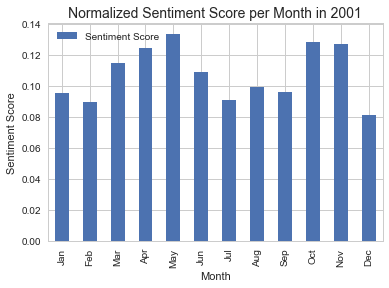

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

negsentdf = pd.DataFrame()
negsentdf['Month'] = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
negsentdf['Sentiment Score'] = [nor_add_negjan,nor_add_negfeb,nor_add_negmar,nor_add_negapr,nor_add_negmay,nor_add_negjun,nor_add_negjul,nor_add_negaug,
                                nor_add_negsep,nor_add_negoct,nor_add_negnov,nor_add_negdec]
fig, ax = plt.subplots()
negsentdf.plot(ax=ax, kind='bar', grid = True)
ax.set_xticklabels(negsentdf['Month'])
ax.set_title("Normalized Sentiment Score per Month in 2001", size =14)
ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Score')

Conclusion: Based on different random samples taken, we have generally observed a rise in negative sentiment during the months of October and November shortly after the scandal became public.

Note: This result may change based on the random sample of size - 1/500th of the dataset taken.

#### Appendix F  - Word Cloud

We will now create word clouds for data in the 'subject' field and 'content' of emails

Download wordcloud package only if you don't have it installed:  
```pip install wordcloud
```  
Note: You will need Microsoft Visual C++ 14.0 to use this package  
This can be downloaded from : http://landinghub.visualstudio.com/visual-cpp-build-tools

In [19]:
import wordcloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

** Creating a wordcloud for the 'subject' of the emails **

(-0.5, 899.5, 499.5, -0.5)

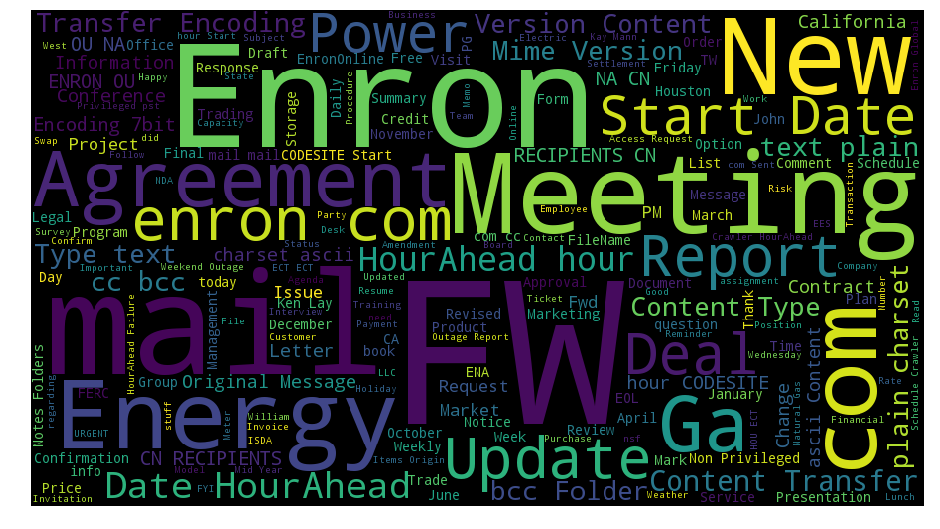

In [20]:
subjects = ' '.join(emails['subject'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=900, height=500, max_words=200,stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

** Creating a wordcloud for the 'content' section of the emails **

Note: If you are running the word cloud on the entire dataset instead of the random sample taken for nltk, modify the line below to not sample the data-  
``` contents = ' '.join(emails.sample(5000)['content'])```

(-0.5, 899.5, 499.5, -0.5)

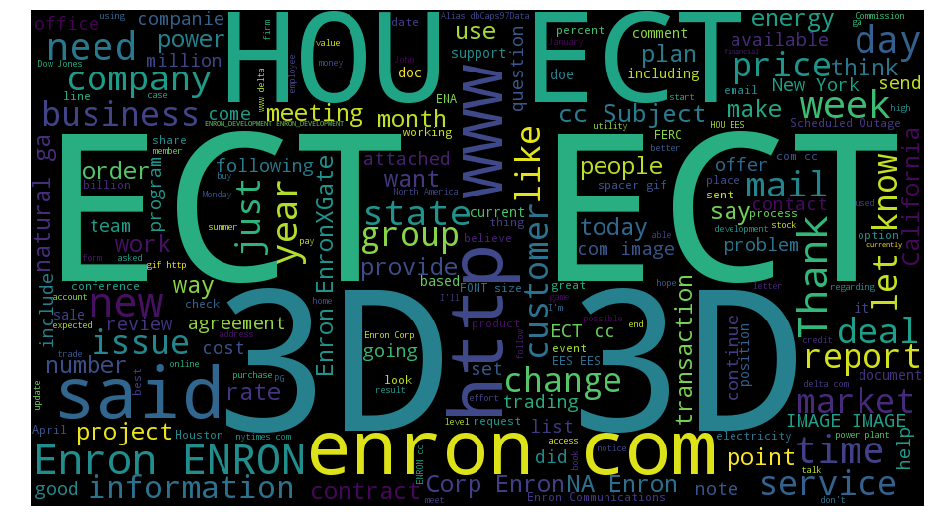

In [21]:
contents = ' '.join(emails['content'])
fig, ax = plt.subplots(figsize=(16, 12))
wc = wordcloud.WordCloud(width=900, height=500, max_words=200,stopwords=ENGLISH_STOP_WORDS).generate(contents)
ax.imshow(wc)
ax.axis("off")